In [8]:
# rm(list=ls())
require(data.table)
require(MASS)
require(ggplot2)
require(gridExtra)


## Resizing notebook plot space
options(repr.plot.width=20, repr.plot.height=12)

In [ ]:
## Original draws
edu_orig<-fread(paste0("/home/j/WORK/01_covariates/02_inputs/education/update_2017/data/output_data/20161121_GBD2016prelim_95+_raked_2/gpr_draws.csv"), header = T)
edu_orig <- edu_orig[, V1:=NULL]
head(edu_orig)

In [3]:
## C-Y-A-S sorted
edu_cyas_sorted <- fread("/home/j/WORK/01_covariates/02_inputs/education/update_2017/data/output_data/20161121_GBD2016prelim_95+_raked_2/gpr_draws_country_year_age_sex_post_copula.csv", header=T)
head(edu_cyas_sorted)

Read 496860 rows and 1004 (of 1004) columns from 6.596 GB file in 00:02:02


location_id,age_group_id,sex_id,year_id,draw0,draw1,draw2,draw3,draw4,draw5,⋯,draw990,draw991,draw992,draw993,draw994,draw995,draw996,draw997,draw998,draw999
6,8,1,1950,3.307142,2.827592,2.757948,4.249206,5.071394,2.934557,⋯,4.356751,2.322269,4.180469,2.513109,5.162916,3.092854,4.724487,3.388213,5.577312,4.587908
6,8,1,1951,3.432201,2.930555,2.842276,4.378471,5.228244,3.035745,⋯,4.487801,2.428924,4.295475,2.647629,5.314488,3.221662,4.805875,3.511333,5.732302,4.730828
6,8,1,1952,3.548912,3.049224,2.949065,4.514694,5.370476,3.165093,⋯,4.640748,2.536450,4.405833,2.749598,5.427717,3.351692,4.929192,3.667129,5.864775,4.859758
6,8,1,1953,3.684932,3.173875,3.082214,4.652346,5.492283,3.293656,⋯,4.758147,2.632981,4.541372,2.860612,5.565173,3.465849,5.080461,3.783408,5.984173,4.995233
6,8,1,1954,3.834647,3.344003,3.211056,4.776449,5.632452,3.425592,⋯,4.881382,2.749436,4.668414,2.973653,5.732036,3.609709,5.233688,3.927052,6.112901,5.120862
6,8,1,1955,3.973987,3.494659,3.342684,4.882421,5.780095,3.553808,⋯,5.012857,2.873348,4.807740,3.080803,5.843649,3.743763,5.368539,4.070804,6.262446,5.249734


In [4]:
## C-Y collapsed after sorting
edu_CY_collapsed_after_sort <- fread("/home/j/WORK/01_covariates/02_inputs/education/update_2017/data/output_data/20161121_GBD2016prelim_95+_raked_2/gpr_draws_country_year_collapsed_after_sort.csv")

Read 17321 rows and 1002 (of 1002) columns from 0.273 GB file in 00:00:05


In [5]:
## Graphing functions
# Test test test


# Raw data : C-Y-A-S
plot_CYAS_pre_sort <- function(loc_id, age = 8, sex= 1) {
    return(ggplot(melt(edu_orig[location_id==6  & age_group_id == 8 & sex_id == 1  , ], 
                       id.vars = c("location_id", "age_group_id", "sex_id", "year_id"), 
     value.name = "draw", variable.names = "variable")) + 
    geom_line(aes(x=year_id, y=draw, group=variable, color=variable)) + 
    scale_x_discrete(breaks = seq(1950,2040,by=5)) +
    theme(legend.position = "none"))+
    ggtitle("Country-Year Collapsed")
    }


# Post sorting : C-Y-A-S
plot_CYAS_post_sort <- function(loc_id, age = 8, sex= 1) {
    return(ggplot(melt(edu_cyas_sorted[location_id==loc_id & age_group_id == age & sex_id == sex, ], 
                       id.vars = c("location_id", "age_group_id", "sex_id", "year_id"), 
                       value.name = "draw") ) + 
    geom_line(aes(x=year_id, y=draw, group=variable, color=variable)) + 
    scale_x_discrete(breaks = seq(1950,2040,by=5)) +
    theme(legend.position = "none"))    +
    ggtitle("Country-Year-Age-Sex Sorted")
    }

# Collapsed after C-Y-A-S sorted : C-Y
plot_CY_collapsed <- function(loc_id) {
    return(ggplot(melt(edu_CY_collapsed_after_sort[location_id==loc_id , ], 
                       id.vars = c("location_id", "year_id"), 
                       value.name = "draw") ) + 
    geom_line(aes(x=year_id, y=draw, group=variable, color=variable)) + 
    scale_x_discrete(breaks = seq(1950,2040,by=5)) +
    theme(legend.position = "none"))    +
    ggtitle("Country-Year-Age-Sex Sorted")
    }


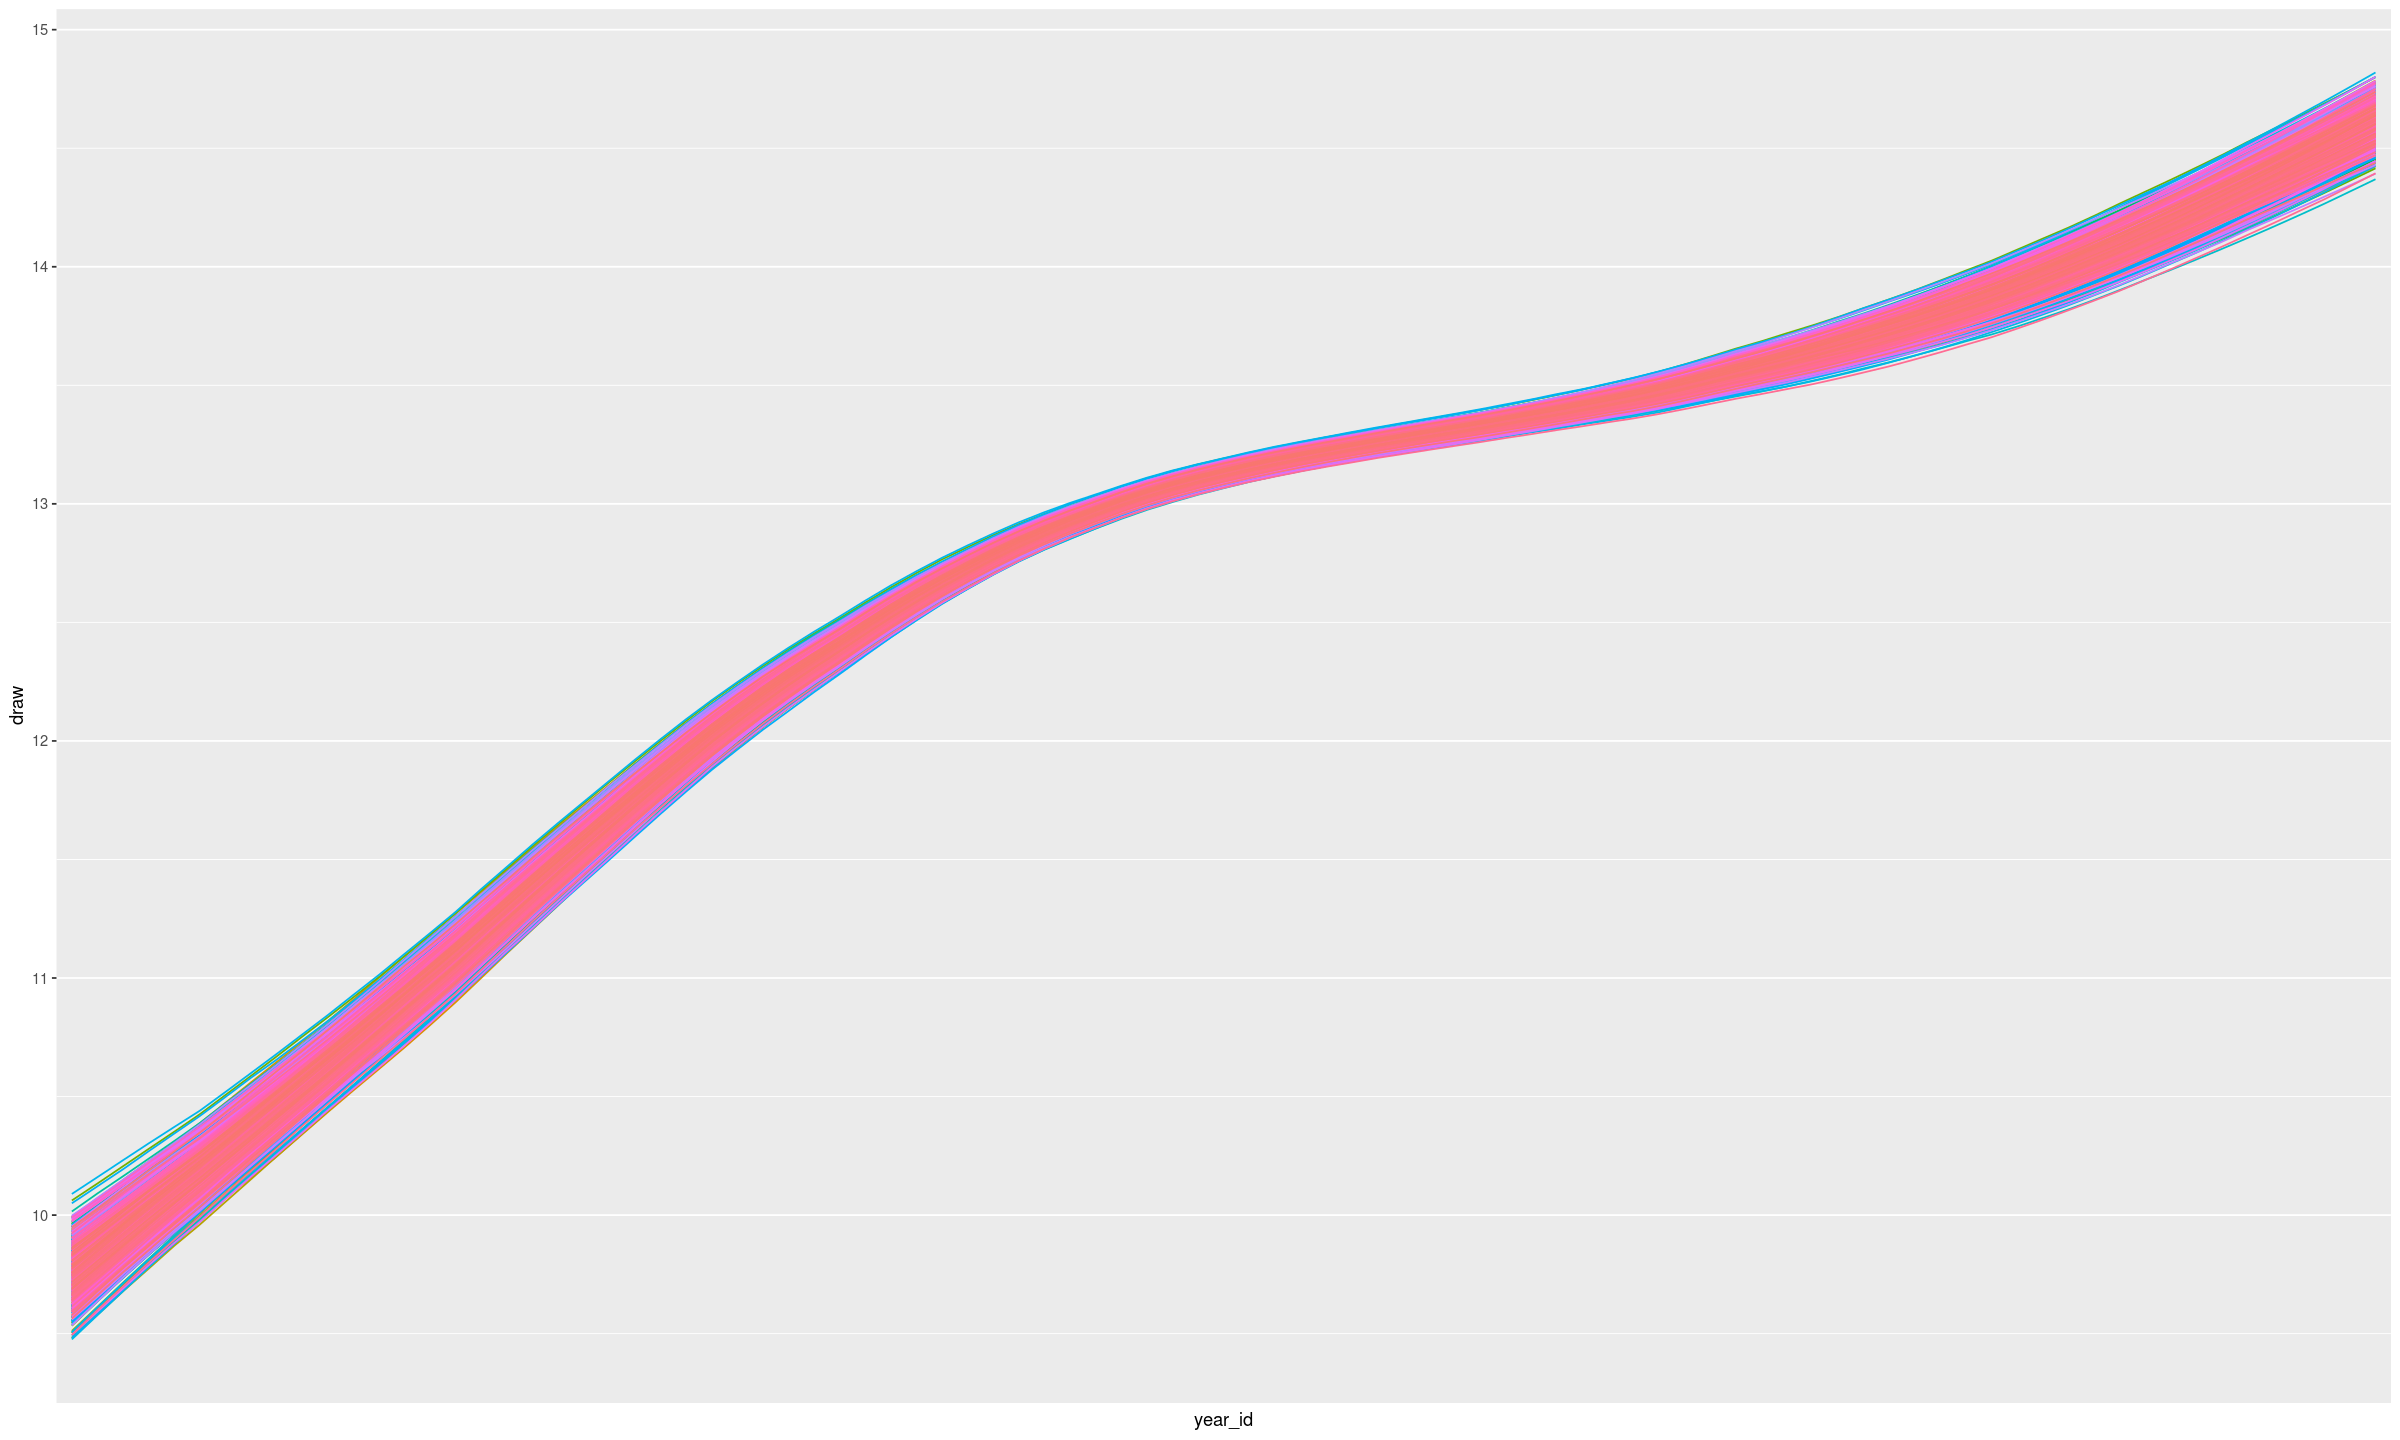

In [11]:
plot_CY_collapsed(102)